In [ ]:
# ################
# # Week 8 Code
# #
# # Plotting the quarterly sales as a bar chart
# # Set the figure size to (10, 6)
# plt.figure(figsize=(10, 6))


# #
# plt.bar(quarterly_sales['Quarter'].dt.to_period('Q').astype(str), quarterly_sales['Total Sales'], color='skyblue')

# # Set the properties of the plot
# plt.title('Quarterly Sales')
# plt.xlabel('Quarter')
# plt.ylabel('Total Sales')
# plt.xticks(rotation=45)
# plt.tight_layout()

# # show the plot (you need this for VS Code)
# plt.show()

In [1]:

import pandas as pd
data = pd.read_csv("Coffee_company.csv")
data.columns = data.columns.str.strip()
data.head()


,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Beverages,United States of America,Robusta,None,2427.75,$3.90,$26.00,"$42,081.00",$-,"$42,081.00","$21,040.50","$16,185.00",01/01/2021,1,January,2021
1,Beverages,Switzerland,Robusta,None,1981.50,$3.90,$26.00,"$34,346.00",$-,"$34,346.00","$17,173.00","$13,210.00",01/01/2021,1,January,2021
2,Snacks,Japan,Robusta,None,3267.00,$3.90,$19.50,"$42,471.00",$-,"$42,471.00","$28,314.00","$10,890.00",01/06/2021,6,June,2021
3,Snacks,Switzerland,Robusta,None,1332.00,$3.90,$19.50,"$17,316.00",$-,"$17,316.00","$11,544.00","$4,440.00",01/06/2021,6,June,2021
4,Snacks,Belgium,Robusta,None,3705.00,$3.90,$19.50,"$48,165.00",$-,"$48,165.00","$32,110.00","$12,350.00",01/06/2021,6,June,2021


In [3]:
data['Units Sold'] = data['Units Sold'].astype(int)
data.head()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Beverages,United States of America,Robusta,None,2427,$3.90,$26.00,"$42,081.00",$-,"$42,081.00","$21,040.50","$16,185.00",01/01/2021,1,January,2021
1,Beverages,Switzerland,Robusta,None,1981,$3.90,$26.00,"$34,346.00",$-,"$34,346.00","$17,173.00","$13,210.00",01/01/2021,1,January,2021
2,Snacks,Japan,Robusta,None,3267,$3.90,$19.50,"$42,471.00",$-,"$42,471.00","$28,314.00","$10,890.00",01/06/2021,6,June,2021
3,Snacks,Switzerland,Robusta,None,1332,$3.90,$19.50,"$17,316.00",$-,"$17,316.00","$11,544.00","$4,440.00",01/06/2021,6,June,2021
4,Snacks,Belgium,Robusta,None,3705,$3.90,$19.50,"$48,165.00",$-,"$48,165.00","$32,110.00","$12,350.00",01/06/2021,6,June,2021


In [ ]:

print(data.columns)
#to check the exact name of each column
data.rename(columns={'Month Name':'Month'}, inplace = True)
data.head()


Index(['Segment', 'Country', 'Product', 'Discount Band', 'Units Sold',
       'Manufacturing Price', 'Sale Price', 'Gross Sales', 'Discounts',
       'Sales', 'COGS', 'Profit', 'Date', 'Month Number', 'Month Name',
       'Year'],
      dtype='object')


In [ ]:
data['Sales'] = pd.to_numeric(data['Sales'].str.replace(',','',regex=False).str.replace('$','',regex=False), errors='coerce')
data['Sales'] = data['Sales'].astype(float)
print(data.head())
total_Sales = data['Sales'].sum()
print("Total Sales: $", total_sales)

In [7]:
#convert 'Date' to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')

#Set 'Date' as the index
data.set_index('Date', inplace=True)

#Calculate quartely sales
quarterly_sales = data['Sales'].resample('Q').sum().reset_index()
quarterly_sales.columns = ['Quarter', 'Total Sales']

print(quarterly_sales)

C:\Users\shyam\AppData\Local\Temp\ipykernel_14664\1702945007.py:8: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_sales = data['Sales'].resample('Q').sum().reset_index()


      Quarter                                        Total Sales
0  2021-03-31   $42,081.00  $34,346.00  $13,586.30  $35,540.5...
1  2021-06-30   $44,272.80  $30,466.80  $685,668.75  $888,416...
2  2021-09-30   $433,143.75  $5,725.20  $15,342.60  $22,783.7...
3  2021-12-31   $10,401.30  $10,401.30  $629,278.65  $629,278...
4  2022-03-31   $29,456.70  $24,042.20  $9,510.41  $24,878.35...
5  2022-06-30   $30,990.96  $21,326.76  $479,968.13  $621,891...
6  2022-09-30   $303,200.63  $4,007.64  $10,739.82  $15,948.6...
7  2022-12-31   $7,280.91  $7,280.91  $440,495.06  $440,495.0...
8  2023-03-31   $71,537.70  $58,388.20  $23,096.71  $60,418.8...
9  2023-06-30   $75,263.76  $51,793.56  $1,165,636.88  $1,510...
10 2023-09-30   $736,344.38  $9,732.84  $26,082.42  $38,732.3...
11 2023-12-31   $17,682.21  $17,682.21  $1,069,773.71  $1,069...


C:\Users\shyam\AppData\Local\Temp\ipykernel_14664\817767060.py:9: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


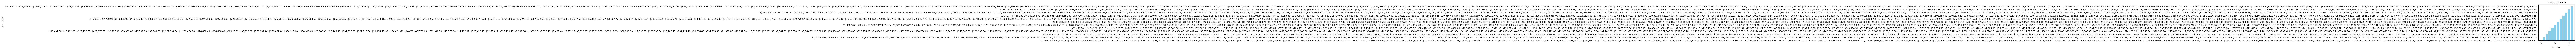

In [9]:
import matplotlib.pyplot as plt
#plotting the quarterly sales as a bar chart
plt.figure(figsize=(3, 3))
plt.bar(quarterly_sales.index, quarterly_sales['Total Sales'], color='skyblue')
plt.title('Quarterly Sales')
plt.xlabel('Quarter')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()